# Buatlah sebuah model K-Means dengan ketentuan
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

**1. Menggunakan data 'Mall_Customers.csv**

In [3]:
#import library
import pandas as pd
import numpy as np  #pustaka numpy, melakukan operasi numerik
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Baca data
data = pd.read_csv('data/Mall_Customers.csv')

data.head() #menampilkan lima baris pertama 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**2. Menentukan fitur yg tepat untuk melakukan clustering**

menggunakan 2 fitur : 
- Annual Income(k$)  = pendapatan tahunan dalam ribu dolar

- Spending Score (1-100) = skor pengeluaran dalam skala 1 hingga 100

In [4]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


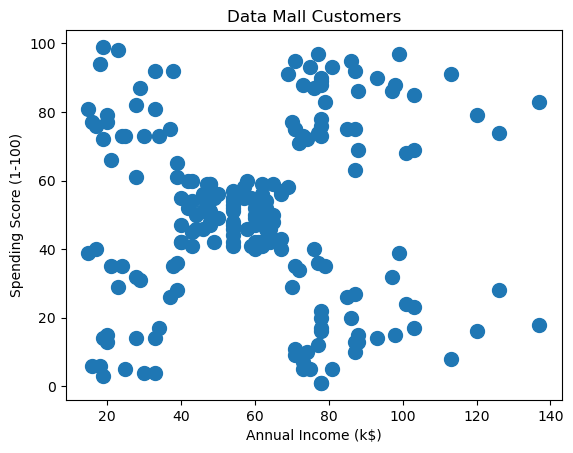

In [5]:
# Plot data tanpa warna
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)

# Menambahkan label sumbu X dan Y
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Data Mall Customers')

# Menampilkan plot
plt.show()

**3. Membuat model K-Means dengan mempertimbangkan jumlah yang terbaik**

c:\Users\nasaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nasaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nasaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nasaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

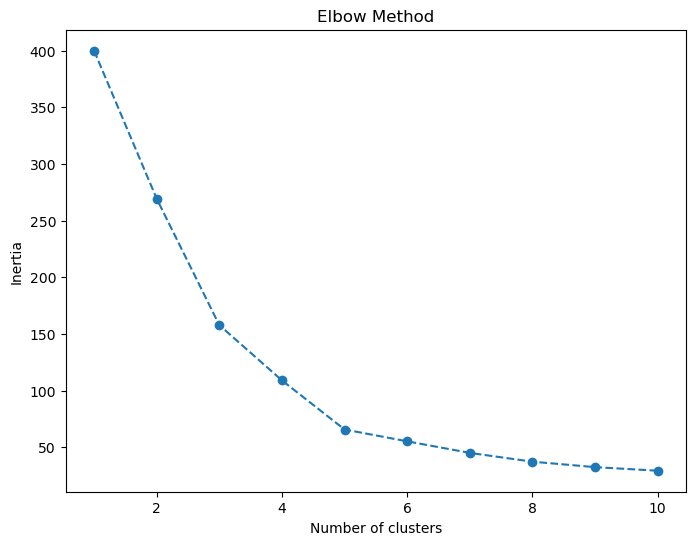

In [6]:
# Menormalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menghitung inersia/SSE(Sum of Squared Errors) untuk berbagai jumlah cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\nasaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nasaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


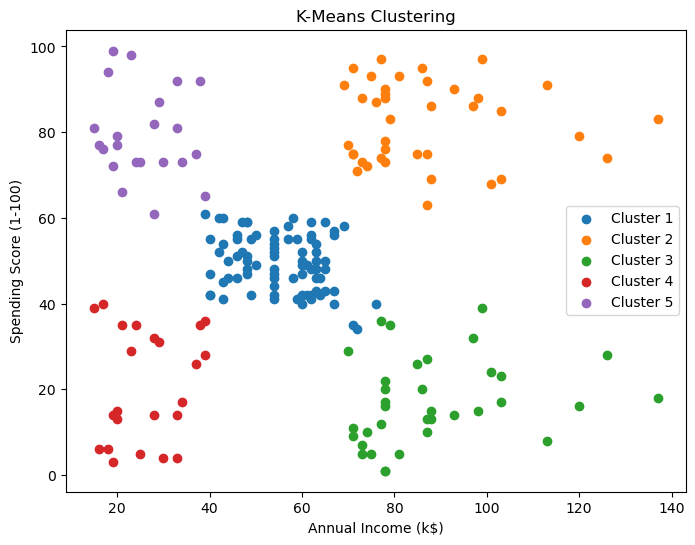

In [7]:
# Membuat model K-Means dengan jumlah cluster yang optimal (misalnya, k=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Menambahkan label cluster ke data
data['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
# Plot titik-titik untuk setiap cluster
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster + 1}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

**4. Mengimplementasikan model SOM untuk segmentasi citra lain**

In [8]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [10]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [11]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [12]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [13]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

**Implementasi model SOM dengan gambar kitten**

In [14]:
from skimage import io

# Load citra Kitten
kitten_path = "data/kitten.jpg"
kitten = io.imread(kitten_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

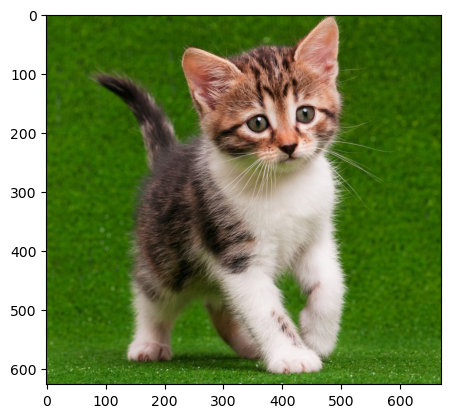

In [15]:
plt.imshow(kitten)

In [16]:
# Latih SOM
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(kitten, num_epochs, initial_learning_rate, initial_neighborhood_radius)

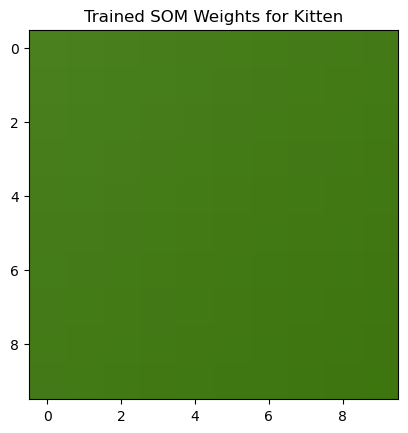

In [17]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Kitten')
plt.show()

- Implementasi model SOM dg gambar female

In [18]:
from skimage import io

# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
female_path = "data/female.tiff"
female = io.imread(female_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

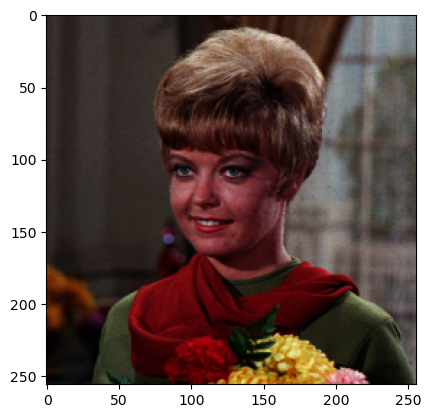

In [19]:
plt.imshow(female)

In [24]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(female, num_epochs, initial_learning_rate, initial_neighborhood_radius)

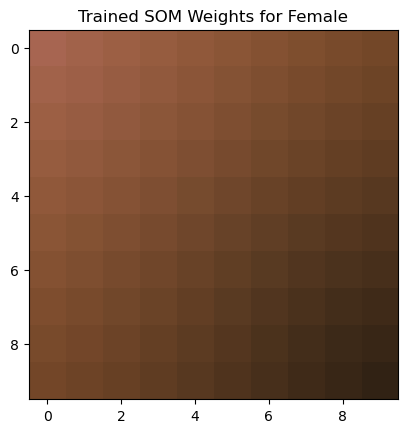

In [25]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Female')
plt.show()